# Jonathan Halverson
# Wednesday, March 16, 2016
# Testing for goodness of fit using chi-square

### Here we develop a method for assessing a null model when the data are binned. Specifically, let's find out if a jury pool represents the population or if there is racial bias.

In [97]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

In [98]:
import pandas as pd
df = pd.read_csv('jury.txt')

In [99]:
df.head()

,race
0,white
1,white
2,white
3,white
4,white


In [100]:
w = df[df.race == 'white']
b = df[df.race == 'black']
h = df[df.race == 'hispanic']
o = df[df.race == 'other']

In [101]:
w_obs = w.size; w_expect = 0.72 * df.size
b_obs = b.size; b_expect = 0.07 * df.size
h_obs = h.size; h_expect = 0.12 * df.size
o_obs = o.size; o_expect = 0.09 * df.size

In [102]:
print w_obs, w_expect
print b_obs, b_expect
print h_obs, h_expect
print o_obs, o_expect

205 198.0
26 19.25
25 33.0
19 24.75


### The null hypothesis is that the jury is representative of the population. The alternative is that there is racial bias. The assumptions are that each case is independent and each type is sufficiently large (>5).

In [103]:
Z1 = (w_obs - w_expect) / np.sqrt(w_expect)
Z2 = (b_obs - b_expect) / np.sqrt(b_expect)
Z3 = (h_obs - h_expect) / np.sqrt(h_expect)
Z4 = (o_obs - o_expect) / np.sqrt(o_expect)
chi_sq_statistic = Z1**2 + Z2**2 + Z3**2 + Z4**2
print Z1, Z2, Z3, Z4, chi_sq_statistic

0.497468338163 1.53846778221 -1.39262124765 -1.15579348755 5.88961038961


### If the null hypothesis is true, then $\chi^2$ follows a distribution called a chi-square distribution:

In [104]:
from scipy.stats import chi2
p_value = 1.0 - chi2.cdf(chi_sq_statistic, df=3)
print p_value, p_value > 0.05

0.117106191309 True


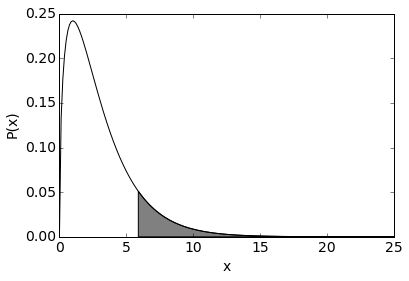

In [105]:
x = np.linspace(0, 25, num=200)
x_right = np.linspace(chi_sq_statistic, 25)
y_right = chi2.pdf(x_right, df=3)

plt.fill_between(x_right, 0, y_right, facecolor='gray')
plt.plot(x, chi2.pdf(x, df=3), 'k-')
plt.xlabel('x')
plt.ylabel('P(x)')

### Hence we fail to reject the null hypothesis. That is, the data do not conclusively suggest that there is racial bias.

### The above can also be done in a single command using scipy.stats:

In [106]:
from scipy.stats import chisquare
chi_sq_stat, p_value = chisquare([w_obs, b_obs, h_obs, o_obs], [w_expect, b_expect, h_expect, o_expect])
print chi_sq_stat, p_value

5.88961038961 0.117106191309


### Below we plot the chi-square distribution for different DoF:

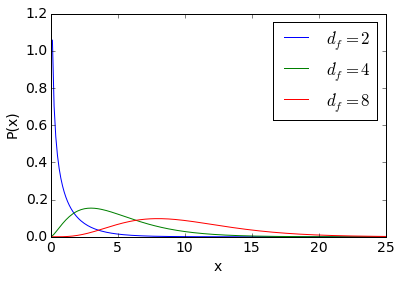

In [107]:
x = np.linspace(0, 25, num=200)
plt.plot(x, chi2.pdf(x, df=1), label='$d_f=2$')
plt.plot(x, chi2.pdf(x, df=5), label='$d_f=4$')
plt.plot(x, chi2.pdf(x, df=10), label='$d_f=8$')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend(loc='upper right')

### Chi-square test can also be used to test if data follow a certain distribution. For instance one can for a list of the number of days between positive gains in the S&P 500. This should follow a geometric distribution. The difference between the two distributions can be found with a chi square test.

# Two-way

### A one-way table describes counts for each outcome in a single variable. A two-way table describes counts for combinations of outcomes for two variables. When we consider a two-way table, we often would like to know, are these variables related in any way? That is, are they dependent (versus independent)?

### The hypothesis test for this Google experiment is really about assessing whether there is statistically significant evidence that the choice of the algorithm affects whether a user performs a second search. In other words, the goal is to check whether the search variable is independent of the algorithm variable.

In [108]:
df = pd.DataFrame({'current':[3511, 1489], 'test1':[1749, 751], 'test2':[1818, 682]}, index=['no_search', 'new_search'])

In [109]:
df

,current,test1,test2
no_search,3511,1749,1818
new_search,1489,751,682


In [110]:
df.sum(axis=1)

no_search     7078
new_search    2922
dtype: int64

In [111]:
df.sum(axis=0)

current    5000
test1      2500
test2      2500
dtype: int64

In [112]:
df.ix['no_search'].sum()

7078

### If the new_search variable is independent of the algorithm then the overall proportion would be:

In [113]:
p_no = df.ix['no_search'].sum() / 1e4
p_new = df.ix['new_search'].sum() / 1e4
p_no, p_new

(0.70779999999999998, 0.29220000000000002)

In [114]:
tmp1 = [p_no * df.current.sum(), p_no * df.test1.sum(), p_no * df.test2.sum()]
tmp2 = [p_new * df.current.sum(), p_new * df.test1.sum(), p_new * df.test2.sum()]
df.ix['no_search_expect'] = tmp1
df.ix['new_search_expect'] = tmp2

In [115]:
df

,current,test1,test2
no_search,3511.0,1749.0,1818.0
new_search,1489.0,751.0,682.0
no_search_expect,3539.0,1769.5,1769.5
new_search_expect,1461.0,730.5,730.5


In [122]:
chi_sq = sum([((df.ix['new_search'][i] - df.ix['new_search_expect'][i])**2) /  df.ix['new_search_expect'][i] + ((df.ix['no_search'][i] - df.ix['no_search_expect'][i])**2) /  df.ix['no_search_expect'][i] for i in [0, 1, 2]])
p_value = 1.0 - chi2.cdf(chi_sq, df=(2 - 1) * (3 - 1))
print chi_sq, p_value, p_value > 0.05

6.12032270124 0.0468801304715 False


# The same calculation can be performed using the chi2_contingency method:

In [125]:
from scipy.stats import chi2_contingency
chi_sq, p_value, dof, expect = chi2_contingency([df.ix['no_search'], df.ix['new_search']])
print chi_sq, p_value, p_value > 0.05

6.12032270124 0.0468801304715 False


### We reject the null hypothesis in favor of the alternative. That is, the performance of the search engines is not all the same.